In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot styles for better visuals
sns.set(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = (12, 6)

In [7]:
# 1. Load the dataset
file_path = 'D:/Users/veres/UEF/Thesis/fadsdiet-analysis/data/processed/fadsdiet_preprocessed.csv'  # Update the path if needed
df = pd.read_csv(file_path)

In [8]:
# 2. Overview of the dataset
print("---- Dataset Information ----")
print(df.info())

print("\n---- First 5 Rows ----")
print(df.head())

---- Dataset Information ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Columns: 344 entries, MOMID to OIL_CONS_perkg
dtypes: float64(330), int64(14)
memory usage: 317.3 KB
None

---- First 5 Rows ----
   MOMID  diet  genotype  group  fad0_weight  fad0_height   fad0_bmi  \
0   1230     0         1      3         98.0        182.0  29.585799   
1   1322     0         1      3         85.5        173.0  28.567610   
2   1416     0         1      3         65.0        173.0  21.718066   
3   1641     0         1      3         62.0        167.0  22.230987   
4   1828     0         1      3         71.0        177.0  22.662709   

   fad0_waist  fad0_systbp1  fad0_diastbp1  ...  FOLD_MUFA_Epros  \
0       106.0           156            100  ...         1.199770   
1       104.0           140             80  ...         1.038298   
2        87.5           148             90  ...         0.856903   
3        81.0           146             88  ...         2.12806

In [9]:
# 3. Statistical summary of numerical data
print("\n---- Statistical Summary ----")
print(df.describe())


---- Statistical Summary ----
             MOMID        diet    genotype       group  fad0_weight  \
count   118.000000  118.000000  118.000000  118.000000   118.000000   
mean   2956.381356    0.491525    0.601695    2.415254    77.102542   
std    1133.531521    0.502060    0.491637    1.088607     9.372705   
min    1230.000000    0.000000    0.000000    1.000000    57.000000   
25%    2055.000000    0.000000    0.000000    1.000000    70.000000   
50%    2821.000000    0.000000    1.000000    3.000000    76.550000   
75%    3758.000000    1.000000    1.000000    3.000000    84.875000   
max    6889.000000    1.000000    1.000000    4.000000   105.000000   

       fad0_height    fad0_bmi  fad0_waist  fad0_systbp1  fad0_diastbp1  ...  \
count   118.000000  118.000000  116.000000    118.000000     118.000000  ...   
mean    176.639831   24.695849   93.827586    133.525424      81.372881  ...   
std       6.480044    2.571205    8.170760     16.905323       8.488098  ...   
min     1

In [10]:
# 4. Checking for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
print("\n---- Missing Values ----")
print(pd.DataFrame({'Count': missing_values, 'Percentage': missing_percent}))


---- Missing Values ----
                    Count  Percentage
MOMID                   0    0.000000
diet                    0    0.000000
genotype                0    0.000000
group                   0    0.000000
fad0_weight             0    0.000000
...                   ...         ...
FOLD_SUCROSE_Epros      0    0.000000
FOLD_FIBER              0    0.000000
fad0_lg_hsCRP           0    0.000000
fad8_lg_hsCRP           0    0.000000
OIL_CONS_perkg          1    0.847458

[344 rows x 2 columns]


In [11]:
# 5. Analysis of categorical columns (if any)
categorical_columns = df.select_dtypes(include=['object']).columns
print("\n---- Categorical Columns ----")
print(categorical_columns)

if len(categorical_columns) > 0:
    for col in categorical_columns:
        print(f"\nValue Counts for {col}:")
        print(df[col].value_counts())


---- Categorical Columns ----
Index([], dtype='object')



---- Numerical Feature Correlation ----


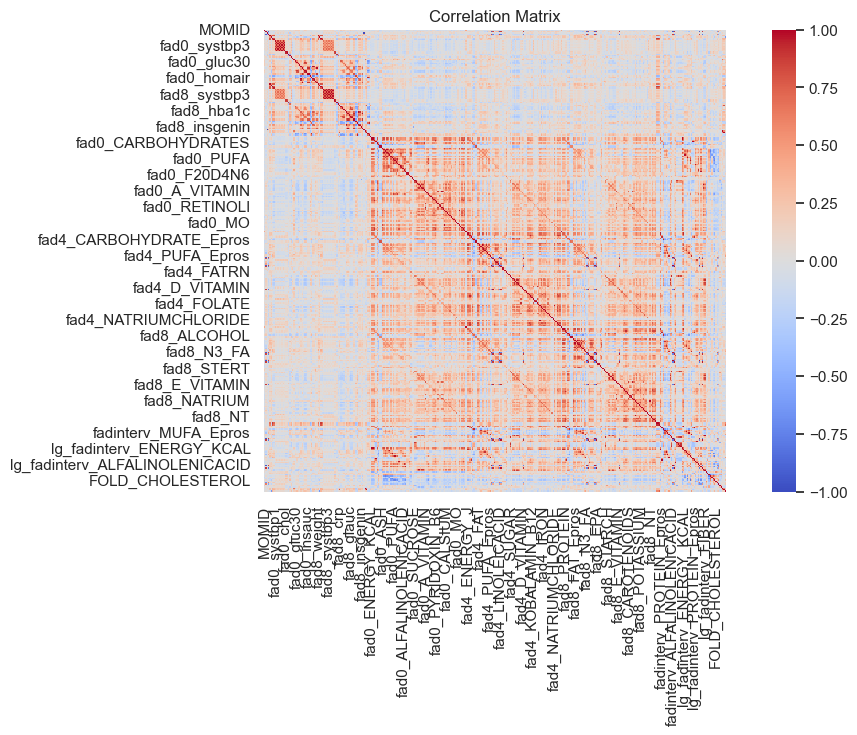

In [12]:
# 6. Correlation analysis
print("\n---- Numerical Feature Correlation ----")
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

In [13]:
# 7. Distribution of numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\n---- Numerical Columns ----")
print(numerical_columns)


---- Numerical Columns ----
Index(['MOMID', 'diet', 'genotype', 'group', 'fad0_weight', 'fad0_height',
       'fad0_bmi', 'fad0_waist', 'fad0_systbp1', 'fad0_diastbp1',
       ...
       'FOLD_MUFA_Epros', 'FOLD_PUFA_Epros', 'FOLD_CHOLESTEROL',
       'FOLD_ALFALINOLENICACID', 'FOLD_LINOLEICACID', 'FOLD_SUCROSE_Epros',
       'FOLD_FIBER', 'fad0_lg_hsCRP', 'fad8_lg_hsCRP', 'OIL_CONS_perkg'],
      dtype='object', length=344)


In [19]:
# Plot histograms for numerical features
# df[numerical_columns].hist(bins=20, figsize=(16, 12), layout=(len(numerical_columns) // 3 + 1, 3))
# plt.suptitle("Histograms of Numerical Features")
# plt.tight_layout()
# plt.show()

In [21]:
# 8. Pairwise relationships for highly correlated features
high_corr_columns = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
top_corr_pairs = high_corr_columns[high_corr_columns > 0.5]  # Threshold for high correlation
top_corr_pairs = top_corr_pairs[top_corr_pairs < 1]  # Exclude self-correlation
print("\n---- Highly Correlated Pairs ----")
print(top_corr_pairs)


---- Highly Correlated Pairs ----
Lnfad0_crp        fad0_lg_hsCRP         1.000000
fad0_ENERGY_KCAL  fad0_ENERGY_J         0.999994
fad4_ENERGY_J     fad4_ENERGY_KCAL      0.999985
fad8_ENERGY_J     fad8_ENERGY_KCAL      0.999866
fad8_FATTRI       fad8_FAT              0.998121
                                          ...   
fad0_A_VITAMIN    fad0_CU               0.500446
fad4_POTASSIUM    lg_fad0_FIBER         0.500255
fad4_STARCH       fad4_FOLATE           0.500250
fad8_PROTEIN      fad8_FOLATE           0.500194
fad8_D_VITAMIN    fad8_RIBOFLAVIN_B2    0.500031
Length: 3066, dtype: float64


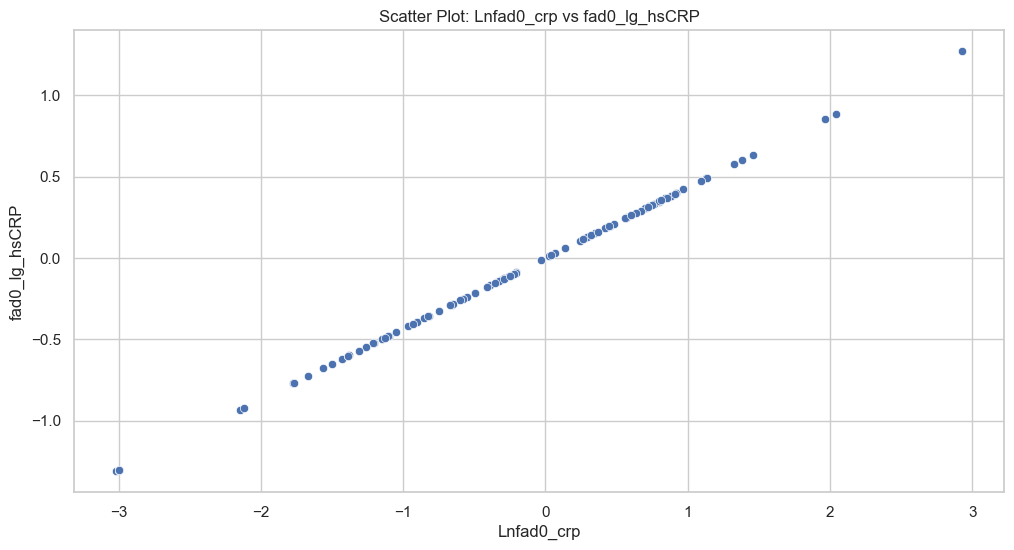

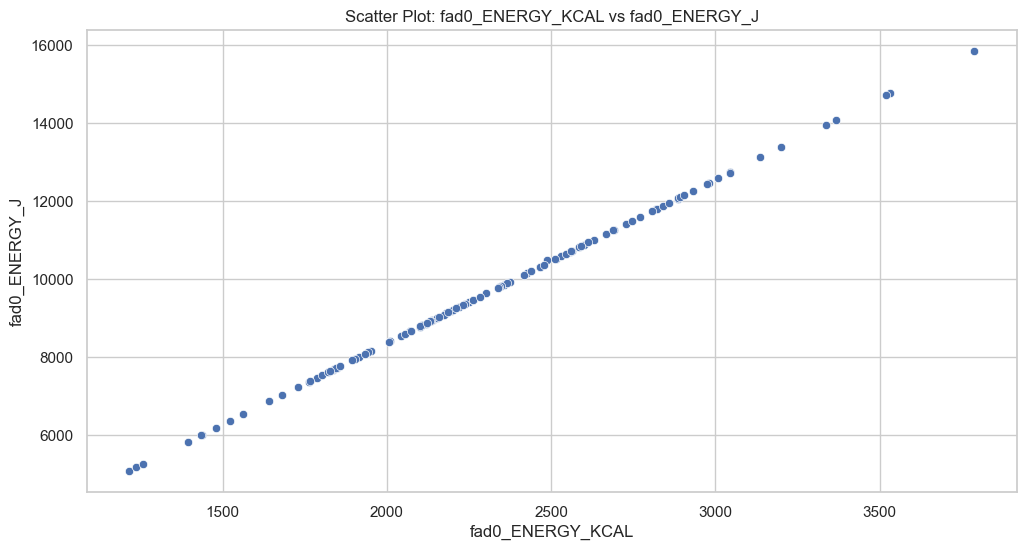

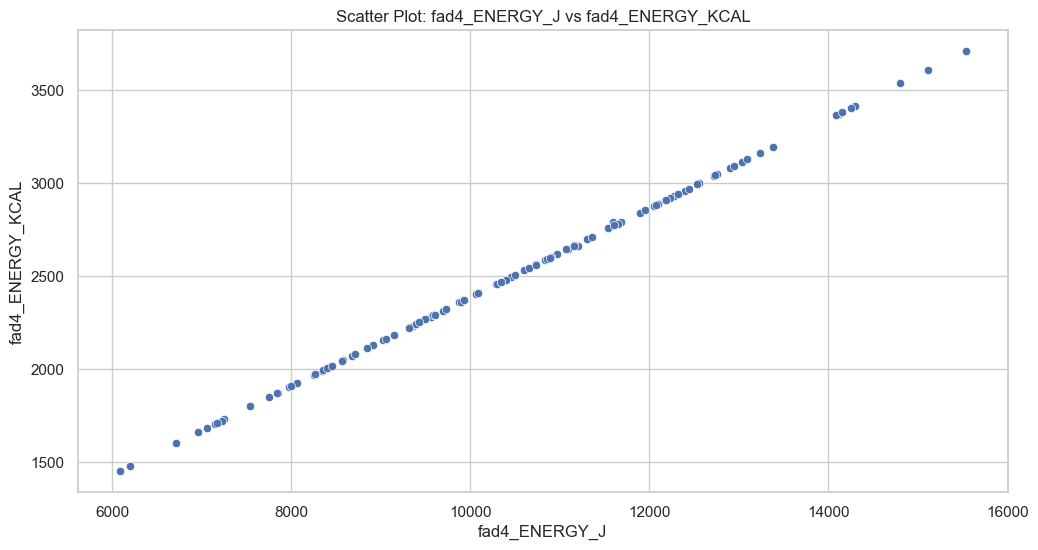

In [22]:
# Scatter plots for the top 3 highly correlated pairs
if not top_corr_pairs.empty:
    for pair in top_corr_pairs.index[:3]:
        col1, col2 = pair
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.title(f"Scatter Plot: {col1} vs {col2}")
        plt.show()

In [23]:
# 9. Final message
print("\nEDA completed. Make sure to handle missing values and outliers if needed!")


EDA completed. Make sure to handle missing values and outliers if needed!
